# Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px

import math
from sklearn.preprocessing import MinMaxScaler

# Load Dataset

In [ ]:
df =  pd.read_csv('hotel_bookings_data.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dataset terdiri dari:- 119390 entry
- Terdapat 29 feature dengan 16 feature memiliki tipe data  **int64(16)**, 4 feature memiliki tipe data  **float64(4)**, dan 9 feature memiliki tipe data **object(9)**
- Jumlah total entri adalah 119390
- terdapat missing values pada feature **children**, **city**, **agent**, dan **company**.
<br>

## 1. Null Value

In [ ]:
# Cek Null Value
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Terdapat null value pada:
- feature **children** : 4
- feature **city** : 488
- feature **agent** : 16.340
- feature **company** : 112593
<br>

## 2. Duplicate Value

In [ ]:
# Cek Duplicate values
df.duplicated().any()

True

In [ ]:
df.duplicated().sum()

33261

Terdapat Duplikat Value berjumlah 33261

## 3. Statistical Summary

In [ ]:
# Pengelompokkan Feature
num = df.select_dtypes(include=['float64', 'int64']).columns
cat = ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel',
       'deposit_type', 'customer_type', 'reservation_status']

In [ ]:
# Deskripsi Feature Numerical
df[num].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Dari Table diatas diketahui:
- **days_in_waiting_list**: Nilai maksimum (391 hari) sangat jauh di atas nilai rata-rata (2.32 hari) dan median (0 hari), menunjukkan adanya beberapa outlier yang sangat tinggi.
- **adr (Average Daily Rate)**: Nilai minimum (-6.38) menunjukkan kemungkinan adanya kesalahan data, karena tarif harian tidak mungkin bernilai negatif.
- **adults**, **children**, **babies**: Nilai maksimum untuk orang dewasa (55), anak-anak (10), dan bayi (10) terlihat sangat tinggi dan mungkin tidak realistis untuk sebuah reservasi tunggal, menunjukkan adanya kemungkinan kesalahan entri data atau outlier.
- **previous_cancellations**: Nilai maksimum (26) sangat jauh di atas nilai rata-rata (0.087) dan median (0), menunjukkan adanya beberapa tamu dengan riwayat pembatalan yang sangat tinggi, yang dapat menjadi outlier.
- **previous_bookings_not_canceled**: Nilai maksimum (72) juga jauh di atas nilai rata-rata (0.137) dan median (0), menunjukkan adanya beberapa tamu dengan banyak reservasi sebelumnya yang tidak dibatalkan.

In [ ]:
# Melihat jumlah value pada feature numerical
for column in df[num].columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'is_canceled':
is_canceled
0    75166
1    44224
Name: count, dtype: int64


Value counts for column 'lead_time':
lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64


Value counts for column 'arrival_date_year':
arrival_date_year
2018    56707
2019    40687
2017    21996
Name: count, dtype: int64


Value counts for column 'arrival_date_week_number':
arrival_date_week_number
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1

In [ ]:
# Deskripsi Feature Categorical
df[cat].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [ ]:
# Melihat jumlah value pada kolom categorical
for column in df[cat].columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'hotel':
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64


Value counts for column 'arrival_date_month':
arrival_date_month
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: count, dtype: int64


Value counts for column 'meal':
meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: count, dtype: int64


Value counts for column 'city':
city
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Nam

## 4. Univariate & Multivariate Analysis

### a. Numericals

In [ ]:
# Numericals
import pandas as pd

def outliers(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    outliers_count = {}
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_count[col] = sum(outlier_indices)

        count = len(df[col])
        print(f"Column '{col}':")
        print(f"  Total values: {count}")
        print(f"  Outliers: {outliers_count[col]}")

    return outliers_count

# Memanggil fungsi outliers
# outliers_count = outliers(DL)
outliers_count = outliers(df)

Column 'is_canceled':
  Total values: 119390
  Outliers: 0
Column 'lead_time':
  Total values: 119390
  Outliers: 3005
Column 'arrival_date_year':
  Total values: 119390
  Outliers: 0
Column 'arrival_date_week_number':
  Total values: 119390
  Outliers: 0
Column 'arrival_date_day_of_month':
  Total values: 119390
  Outliers: 0
Column 'stays_in_weekend_nights':
  Total values: 119390
  Outliers: 265
Column 'stays_in_weekdays_nights':
  Total values: 119390
  Outliers: 3354
Column 'adults':
  Total values: 119390
  Outliers: 29710
Column 'children':
  Total values: 119390
  Outliers: 8590
Column 'babies':
  Total values: 119390
  Outliers: 917
Column 'is_repeated_guest':
  Total values: 119390
  Outliers: 3810
Column 'previous_cancellations':
  Total values: 119390
  Outliers: 6484
Column 'previous_bookings_not_canceled':
  Total values: 119390
  Outliers: 3620
Column 'booking_changes':
  Total values: 119390
  Outliers: 18076
Column 'agent':
  Total values: 119390
  Outliers: 0
Column '

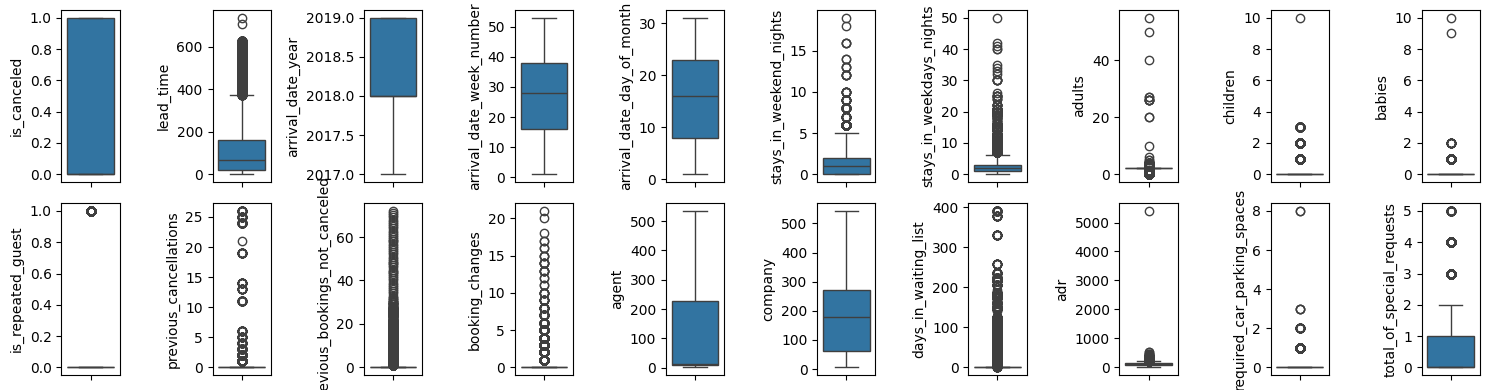

In [ ]:
# Cek outlier Feature Numeric
plt.figure(figsize=(15, 4))
for i in range(0, len(num)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df[num[i]], orient='v')
    plt.tight_layout()

Berdasarkan Boxplot diketahui:
- Rata-rata feature memiliki outlier

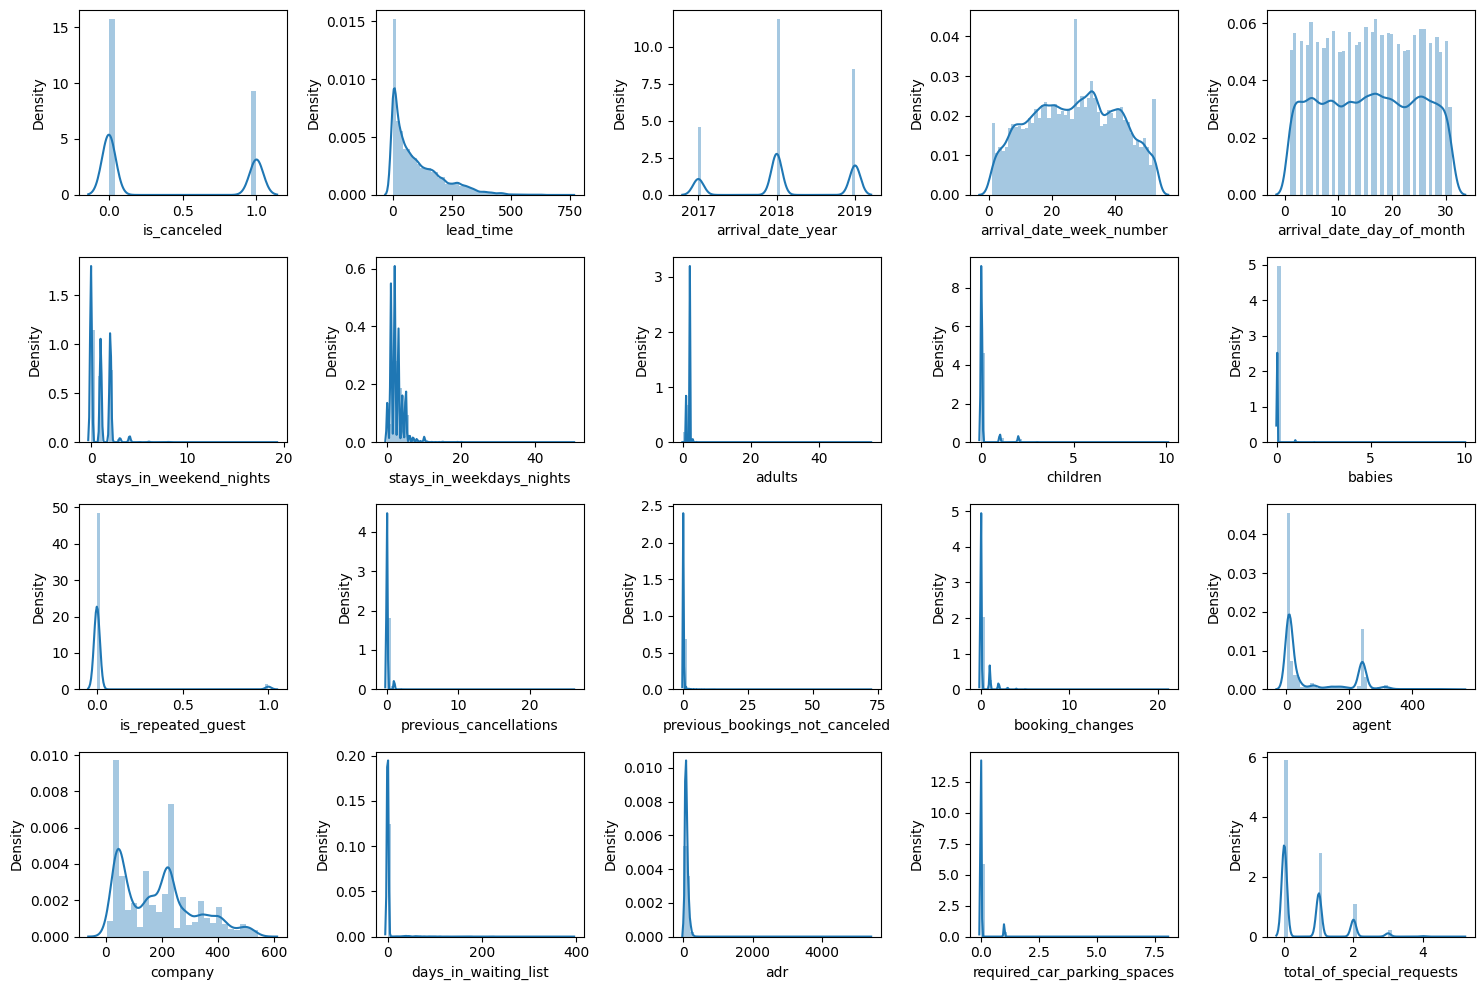

In [ ]:
# Distribusi Feature Numeric
plt.figure(figsize=(15, 10))
for i in range(0, len(num)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[num[i]])
    plt.tight_layout()

Berdasarkan Plot Distribusi diketahui:
- Mayoritas feature berdistribusi Positively Skewed
- Feature **arrival_date_week_number** dan **arrival_date_day_of_month** berdistribusi cenderung normal

### b. Categoricals

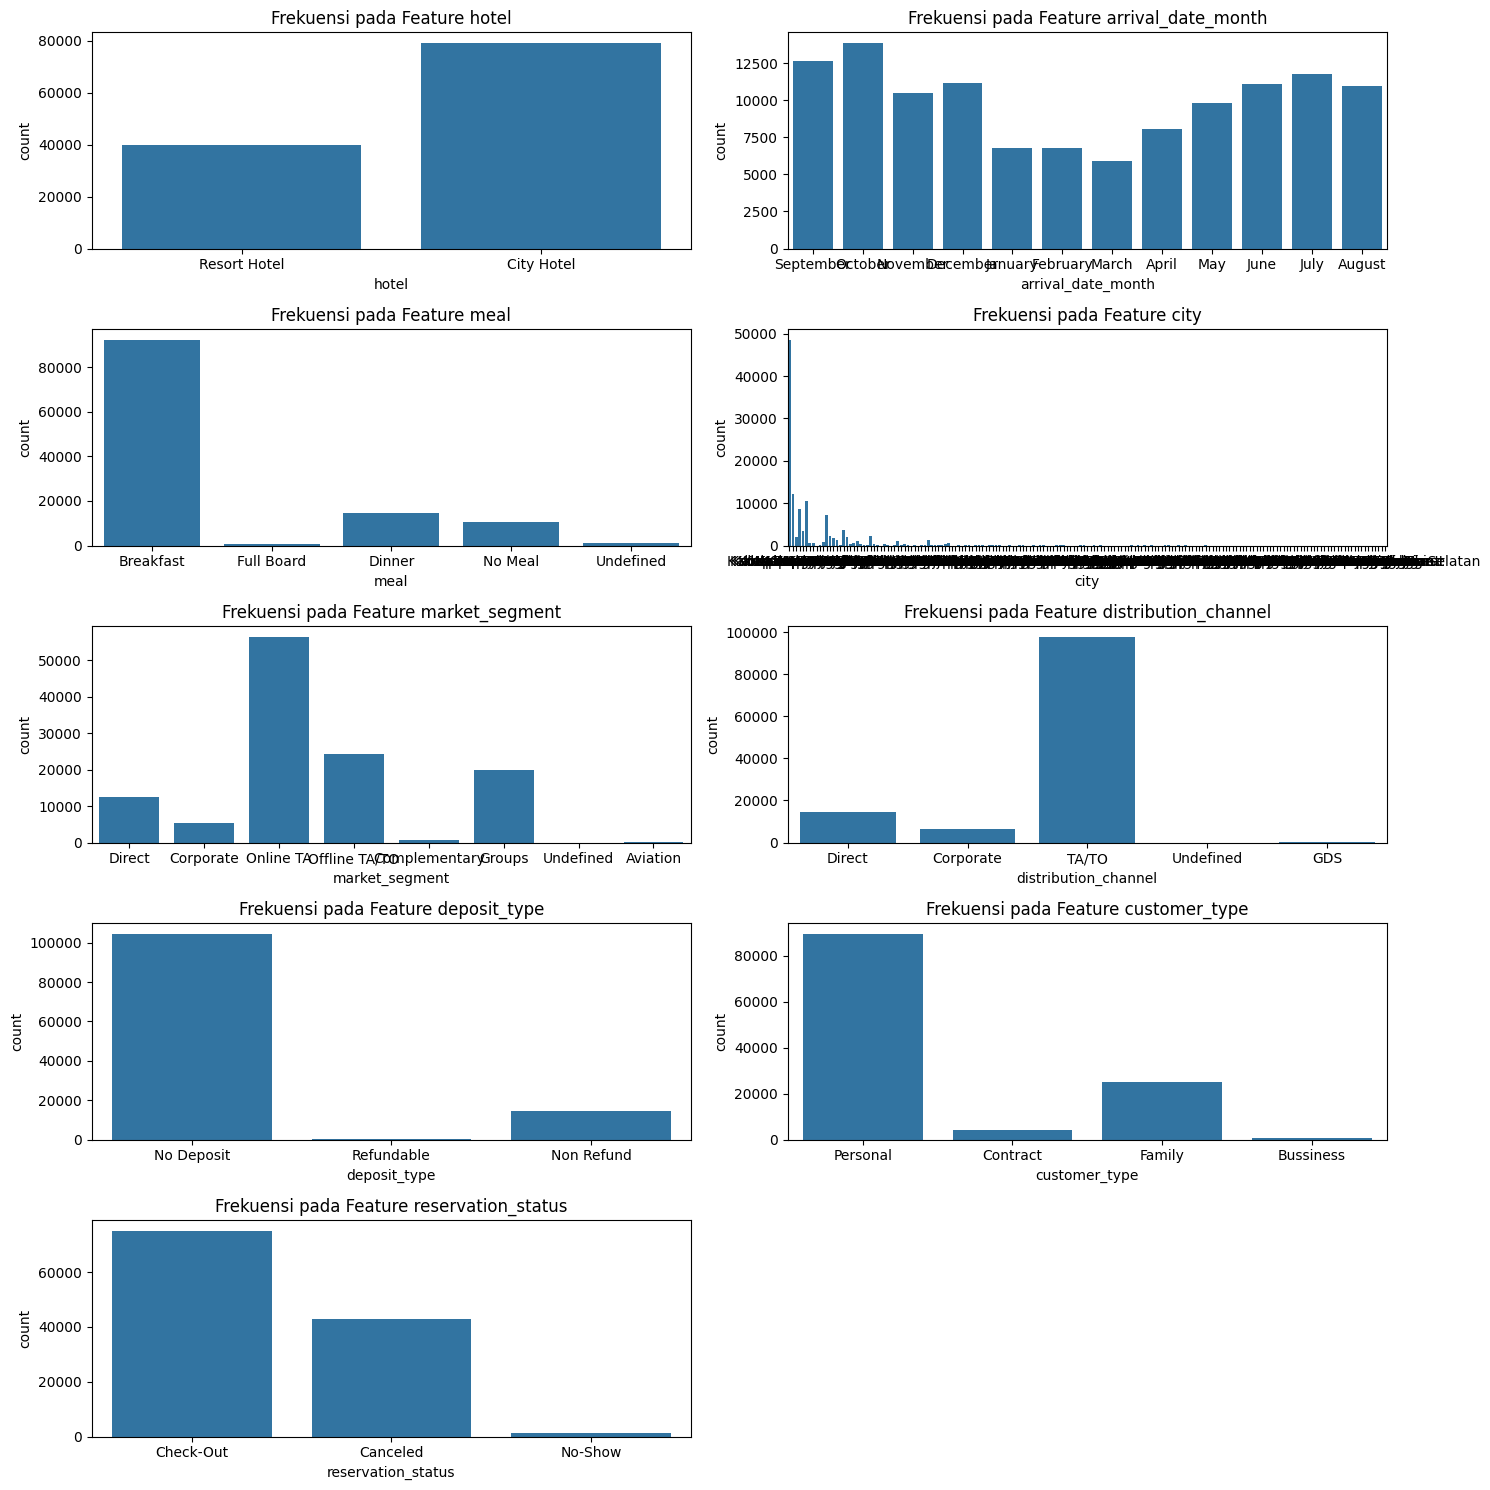

In [ ]:
# Distriusi feature kategorikal
plt.figure(figsize=(15, 15))
for i in range(len(cat)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cat[i]])
    plt.title(f'Frekuensi pada Feature {cat[i]}')
    plt.tight_layout()

plt.show()


# PRE-PROCESSING DATA

In [ ]:
df2 = df.copy()

## 1. Data Cleansing

### a. Handle Missing Value

In [ ]:
# Cek Null Value
df2.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Solusi:
- feature **children** : 4, meghapus baris karena hanya sedikit value null
- feature **city** : 488, mengisi value null dengan "Undefined"
- feature **agent** : 16.340, mengisi value null dengan "0"
- feature **company** : 112593, mengisi value null dengan "0"

In [ ]:
# 1. Menghapus baris dengan nilai null di kolom 'children'
df2.dropna(subset=['children'], inplace=True)

# 2. Mengisi nilai null di kolom 'city' dengan "Undefined"
df2['city'].fillna('Undefined', inplace=True)

# 3. Mengisi nilai null di kolom 'agent' dengan 0
df2['agent'].fillna(0, inplace=True)

# 4. Mengisi nilai null di kolom 'company' dengan 0
df2['company'].fillna(0, inplace=True)

### b. Handle Duplicate Data

In [ ]:
# Hitung jumlah data duplicate
print(f'Jumlah row duplicated = {df2.duplicated().sum()}')

Jumlah row duplicated = 33261


In [ ]:
# Menghapus Duplicate
# df3 = df2.drop_duplicates()

Faktor data duplikat tidak dihapus:
- Jumlah data terlalu banyak
- Mempengaruhi analisis statistik

### c. Handle Outliers

In [ ]:
df3 = df2.copy()

In [ ]:
# Menghapus baris dengan 'adr' kurang dari 0 atau lebih dari 5000
index_adr = df3[(df3['adr'] < 0) | (df3['adr'] > 5000)].index
df3.drop(index=index_adr, inplace=True)

# Menghapus baris dengan 'required_car_parking_spaces' sama dengan 8
index_parking = df3[(df3['required_car_parking_spaces'] == 8)].index
df3.drop(index=index_parking, inplace=True)

# Menghapus baris dengan 'babies' lebih dari 8
index_bb = df3[(df3['babies'] > 8)].index
df3.drop(index=index_bb, inplace=True)

# Menghapus baris dengan 'children' sama dengan 10
index_ch = df3[(df3['children'] == 10)].index
df3.drop(index=index_ch, inplace=True)

# Menghapus baris dengan total tamu (adults + children + babies) sama dengan 0
index_guest_0 = df3[(df3['adults'] + df3['children'] + df3['babies']) == 0].index
df3.drop(index=index_guest_0, inplace=True)

# Reset Index
df3.reset_index(drop=True, inplace=True)


print(f'\nJumlah baris sebelum memfilter outlier: {len(df2)}')
print(f'Jumlah baris setelah memfilter outlier: {len(df3)}')



Jumlah baris sebelum memfilter outlier: 119386
Jumlah baris setelah memfilter outlier: 119199


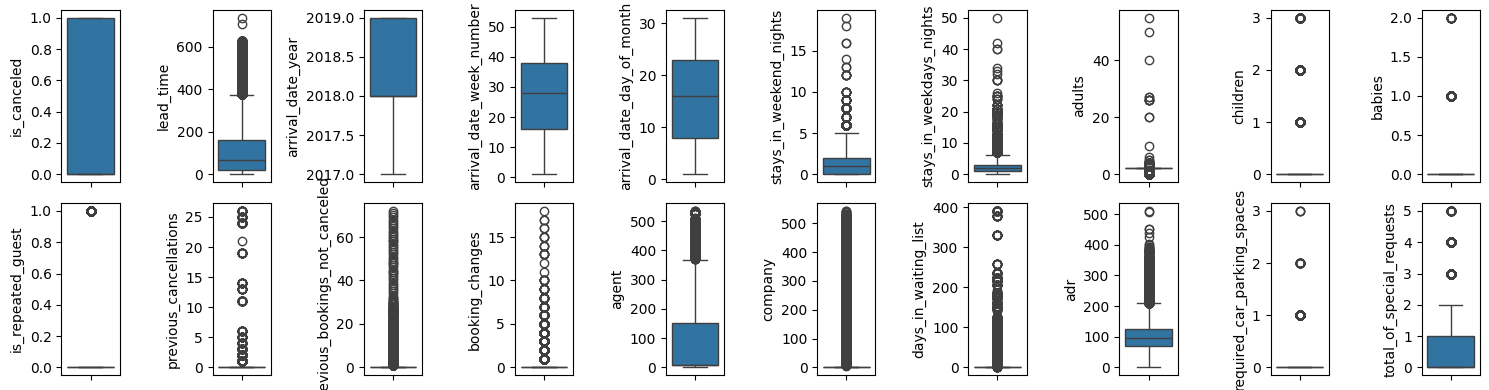

In [ ]:
# Boxplot setelah menghapus outleir
plt.figure(figsize=(15, 4))
for i in range(0, len(num)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df3[num[i]], orient='v')
    plt.tight_layout()

### d. Feature Transformation

In [ ]:
# Normalisai
from sklearn.preprocessing import MinMaxScaler

norm_df = df3.copy()

# Min-Max Scaling
scaler = MinMaxScaler()
norm_df[num] = scaler.fit_transform(df3[num])

# Menampilkan skewness sebelum transformasi
skewness_before_norm = df3[num].skew()
print("\nSkewness sebelum normalisasi:")
print(skewness_before_norm)

# Periksa skewness setelah normalisasi
skewness_after_norm = norm_df[num].skew()
print("\nSkewness setelah normalisasi:")
print(skewness_after_norm)

# Menghitung pengurangannya
skewness_reduction_norm = skewness_before_norm - skewness_after_norm
print("\nPengurangan skewness setelah normalisasi:")
print(skewness_reduction_norm)


Skewness sebelum normalisasi:
is_canceled                        0.535198
lead_time                          1.345748
arrival_date_year                 -0.232497
arrival_date_week_number          -0.010205
arrival_date_day_of_month         -0.002188
stays_in_weekend_nights            1.320258
stays_in_weekdays_nights           2.755161
adults                            18.775080
children                           4.012356
babies                            11.712582
is_repeated_guest                  5.366813
previous_cancellations            24.442803
previous_bookings_not_canceled    23.539890
booking_changes                    5.501252
agent                              1.298476
company                            5.928980
days_in_waiting_list              11.952798
adr                                1.030432
required_car_parking_spaces        3.692557
total_of_special_requests          1.349116
dtype: float64

Skewness setelah normalisasi:
is_canceled                        0.535198

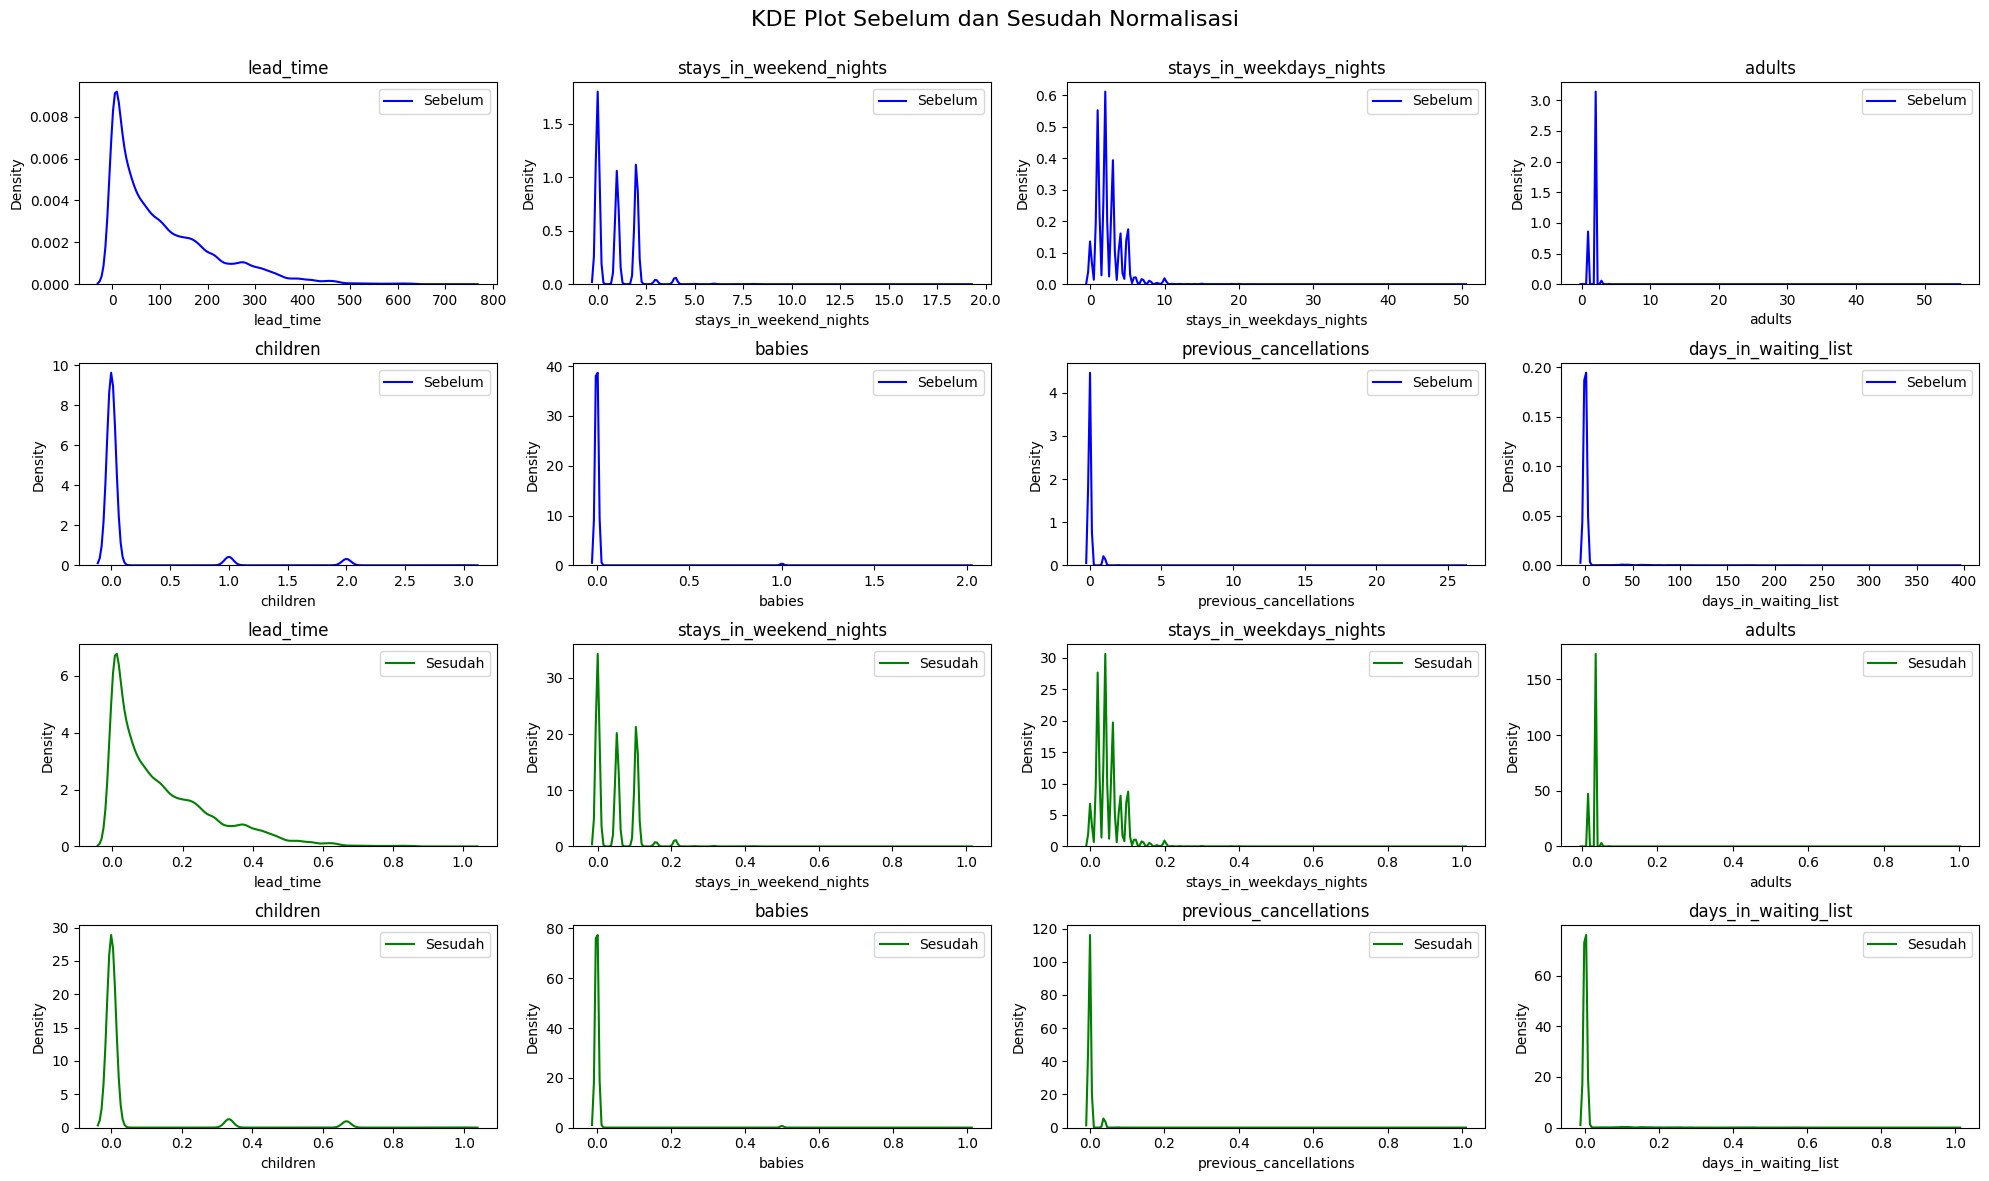

In [ ]:
selected_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_weekdays_nights',
                     'adults', 'children', 'babies', 'previous_cancellations', 'days_in_waiting_list']

plt.figure(figsize=(20, 12))
plt.suptitle('KDE Plot Sebelum dan Sesudah Normalisasi', fontsize=16)

# Plot KDE sebelum normalisasi
for i, feature in enumerate(selected_features):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(df3[feature], color='blue', label='Sebelum')
    plt.title(feature)
    plt.legend()

# Plot KDE sesudah normalisasi
for i, feature in enumerate(selected_features):
    plt.subplot(4, 4, i+9)  # Dimulai dari subplot ke-9
    sns.kdeplot(norm_df[feature], color='green', label='Sesudah')
    plt.title(feature)
    plt.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

Berdasarkan distribusi nromalisasi menunjukkan bahwa normalisasi tidak mempengaruhi distribusi skewness dari fitur-fitur ini. Skewness yang sama sebelum dan sesudah normalisasi menunjukkan bahwa normalisasi tidak mengubah bentuk distribusi data.

### e. Feature Selection

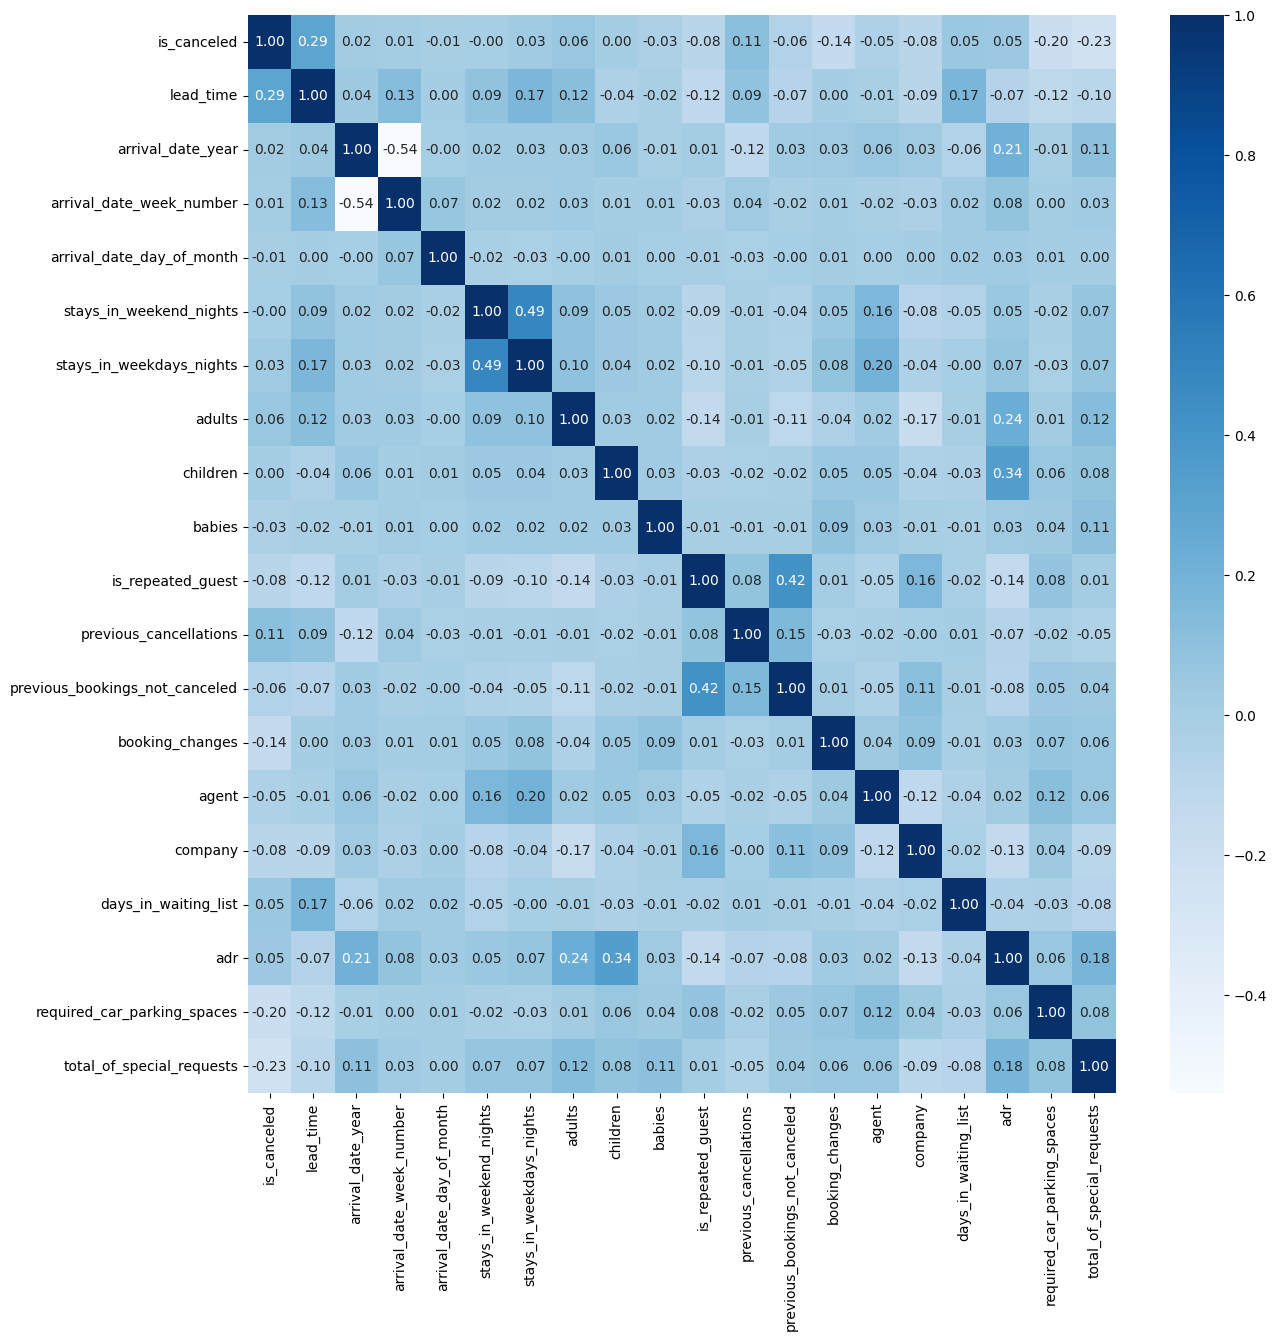

In [ ]:
# Heatmap Numerical
numerical_columns = df3.select_dtypes(include=['number']).columns  # Select only numeric columns
corr_matrix = df3[numerical_columns].corr()  # Compute correlation matrix

plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [ ]:
# Replace feature meal
df3['meal'].replace('Undefined', 'No Meal', inplace = True)
df3['meal'].replace(['Breakfast', 'Full Board', 'Dinner'], 'With Meal', inplace = True)

In [ ]:
df3['meal'].unique()

array(['With Meal', 'No Meal'], dtype=object)

In [ ]:
# Filtering feature total_guests
# Hitung total jumlah tamu untuk setiap pemesanan
df3['total_guests'] = df3['adults'] + df3['children'] + df3['babies']

# Tentukan kondisi untuk mempertahankan data, guest > 1
condition = (df3['total_guests'] > 0)

# Filter DataFrame berdasarkan kondisi
df4 = df3[condition]

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119199 entries, 0 to 119198
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119199 non-null  object 
 1   is_canceled                     119199 non-null  int64  
 2   lead_time                       119199 non-null  int64  
 3   arrival_date_year               119199 non-null  int64  
 4   arrival_date_month              119199 non-null  object 
 5   arrival_date_week_number        119199 non-null  int64  
 6   arrival_date_day_of_month       119199 non-null  int64  
 7   stays_in_weekend_nights         119199 non-null  int64  
 8   stays_in_weekdays_nights        119199 non-null  int64  
 9   adults                          119199 non-null  int64  
 10  children                        119199 non-null  float64
 11  babies                          119199 non-null  int64  
 12  meal            

### f. simpan CSV

In [ ]:
# Simpan DataFrame df4 sebagai file CSV dengan nama hotel_cleaned.csv
#df4.to_csv('hotel_cleaned.csv', index=False)


# Monthly Hotel Booking Analysis Based On Hotel Type




In [ ]:
df_clean =  pd.read_csv('hotel_cleaned.csv')

## Ratio Number of Booking

In [ ]:
# Membuat tabel agregat
agg_table = df_clean.groupby(['hotel', 'arrival_date_month', 'arrival_date_year']).size().reset_index(name='num_bookings')

# Menampilkan tabel agregat
print(agg_table)

           hotel arrival_date_month  arrival_date_year  num_bookings
0     City Hotel              April               2018          2365
1     City Hotel              April               2019          2585
2     City Hotel             August               2018          3921
3     City Hotel             August               2019          3964
4     City Hotel           December               2017          3381
5     City Hotel           December               2018          4212
6     City Hotel           February               2017          1649
7     City Hotel           February               2018          2465
8     City Hotel            January               2017          1233
9     City Hotel            January               2018          3103
10    City Hotel               July               2018          3673
11    City Hotel               July               2019          4548
12    City Hotel               June               2018          3558
13    City Hotel               Jun

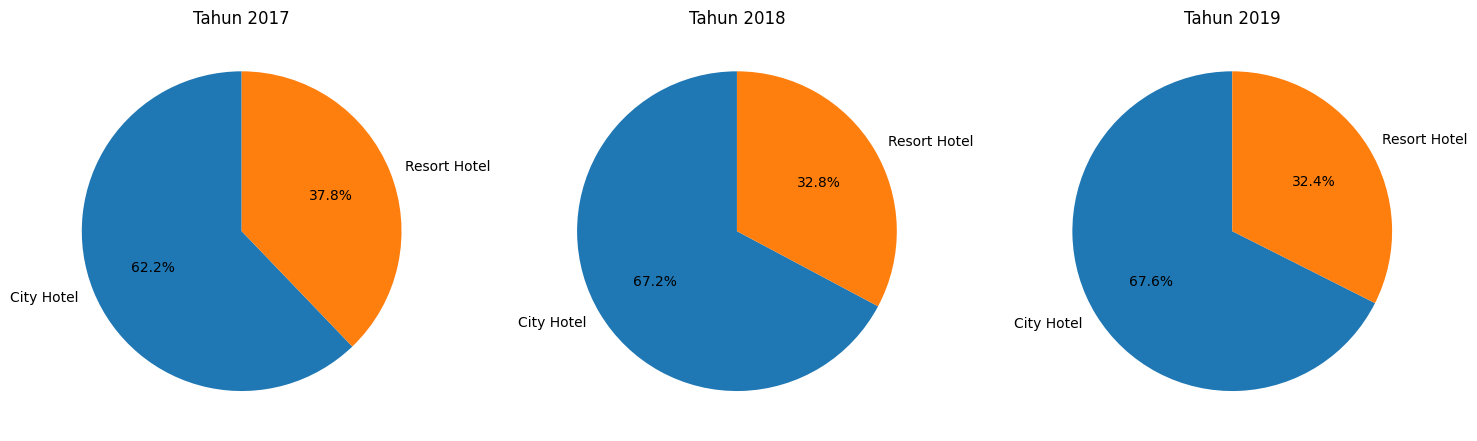

In [ ]:
# Membuat Pie chart
# Filter data berdasarkan tahun
data_2017 = agg_table[agg_table['arrival_date_year'] == 2017]
data_2018 = agg_table[agg_table['arrival_date_year'] == 2018]
data_2019 = agg_table[agg_table['arrival_date_year'] == 2019]

# Hitung total pemesanan untuk masing-masing tahun dan tipe hotel
total_2017_city = data_2017[data_2017['hotel'] == 'City Hotel']['num_bookings'].sum()
total_2017_resort = data_2017[data_2017['hotel'] == 'Resort Hotel']['num_bookings'].sum()

total_2018_city = data_2018[data_2018['hotel'] == 'City Hotel']['num_bookings'].sum()
total_2018_resort = data_2018[data_2018['hotel'] == 'Resort Hotel']['num_bookings'].sum()

total_2019_city = data_2019[data_2019['hotel'] == 'City Hotel']['num_bookings'].sum()
total_2019_resort = data_2019[data_2019['hotel'] == 'Resort Hotel']['num_bookings'].sum()

# Persentase pemesanan per tahun
labels = ['City Hotel', 'Resort Hotel']

sizes_2017 = [total_2017_city, total_2017_resort]
sizes_2018 = [total_2018_city, total_2018_resort]
sizes_2019 = [total_2019_city, total_2019_resort]

# Plotting pie charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.pie(sizes_2017, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Tahun 2017')

ax2.pie(sizes_2018, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Tahun 2018')

ax3.pie(sizes_2019, labels=labels, autopct='%1.1f%%', startangle=90)
ax3.set_title('Tahun 2019')

plt.tight_layout()
plt.show()

Key Takeaways:
- Hotel **City Hotel** mendominasi total booking setiap tahunnya

## Normalization

In [ ]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi kolom num_bookings
agg_table['num_bookings_normalized'] = scaler.fit_transform(agg_table[['num_bookings']])

# Tampilkan hasil
print(agg_table)


           hotel arrival_date_month  arrival_date_year  num_bookings  \
0     City Hotel              April               2018          2365   
1     City Hotel              April               2019          2585   
2     City Hotel             August               2018          3921   
3     City Hotel             August               2019          3964   
4     City Hotel           December               2017          3381   
5     City Hotel           December               2018          4212   
6     City Hotel           February               2017          1649   
7     City Hotel           February               2018          2465   
8     City Hotel            January               2017          1233   
9     City Hotel            January               2018          3103   
10    City Hotel               July               2018          3673   
11    City Hotel               July               2019          4548   
12    City Hotel               June               2018          

## Sort Data Monthly

In [ ]:
# Dictionary untuk urutan nama bulan
bulan_urutan = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Mengubah kolom arrival_date_month menjadi tipe categorical dengan urutan yang sudah ditentukan
agg_table['arrival_date_month'] = pd.Categorical(agg_table['arrival_date_month'], categories=bulan_urutan.keys(), ordered=True)

# Mengurutkan berdasarkan bulan
agg_table = agg_table.sort_values(by='arrival_date_month', key=lambda x: x.map(bulan_urutan))

# Menampilkan hasil
print(agg_table)


           hotel arrival_date_month  arrival_date_year  num_bookings  \
34  Resort Hotel            January               2017          1104   
35  Resort Hotel            January               2018          1331   
8     City Hotel            January               2017          1233   
9     City Hotel            January               2018          3103   
32  Resort Hotel           February               2017          1264   
6     City Hotel           February               2017          1649   
7     City Hotel           February               2018          2465   
33  Resort Hotel           February               2018          1381   
40  Resort Hotel              March               2018           884   
41  Resort Hotel              March               2019          1307   
15    City Hotel              March               2019          2366   
14    City Hotel              March               2018          1363   
27  Resort Hotel              April               2019          

## Plot Monthly Trend Booking

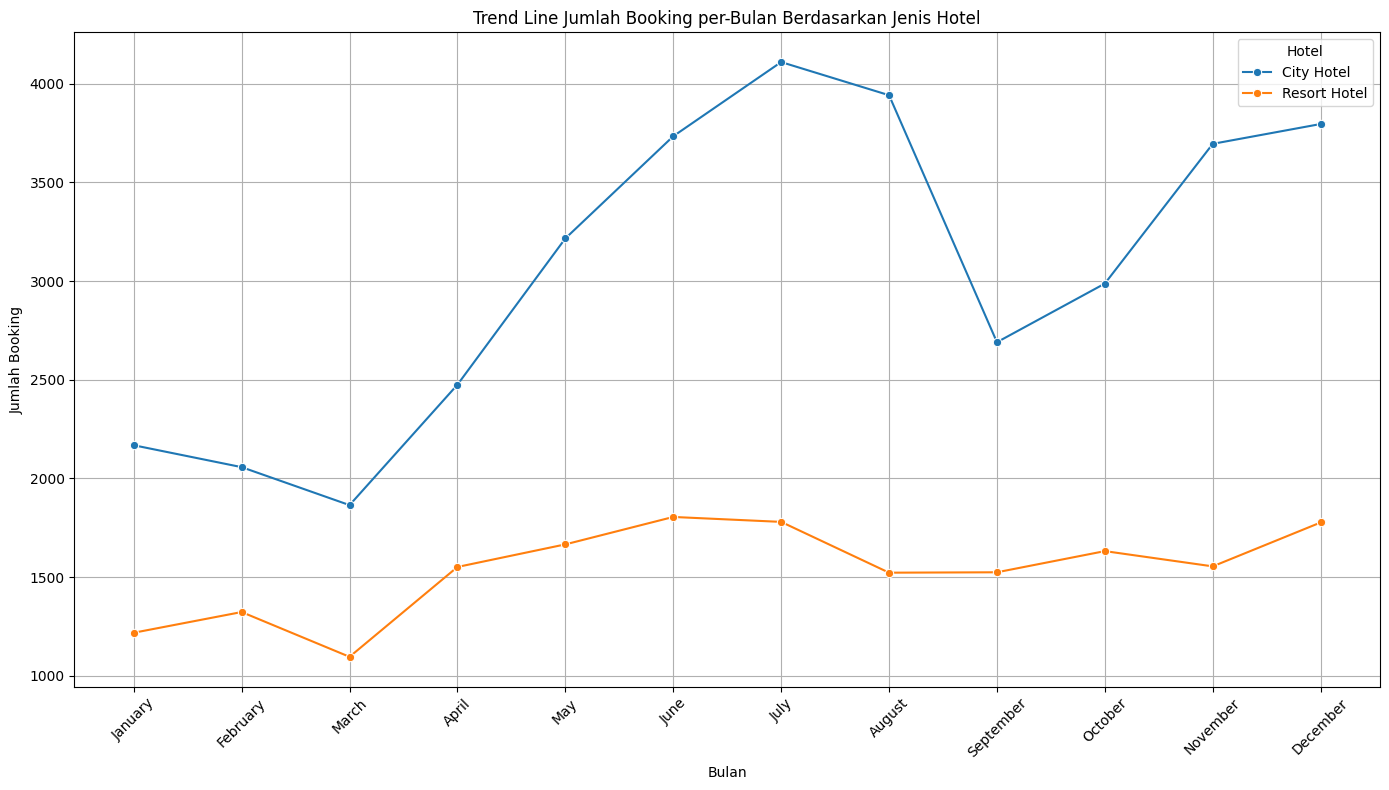

In [ ]:
# Filter data untuk City Hotel dan Resort Hotel
agg_city_resort = agg_table[(agg_table['hotel'] == 'City Hotel') | (agg_table['hotel'] == 'Resort Hotel')]

plt.figure(figsize=(14, 8))

# Line chart untuk City Hotel
sns.lineplot(data=agg_city_resort[agg_city_resort['hotel'] == 'City Hotel'],
             x='arrival_date_month', y='num_bookings',
             marker='o',
             label='City Hotel',
             ci=None)  # Menghilangkan area

# Line chart untuk Resort Hotel
sns.lineplot(data=agg_city_resort[agg_city_resort['hotel'] == 'Resort Hotel'],
             x='arrival_date_month', y='num_bookings',
             marker='o',
             label='Resort Hotel',
             ci=None)  # Menghilangkan area



plt.title('Trend Line Jumlah Booking per-Bulan Berdasarkan Jenis Hotel')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Booking')
plt.legend(title='Hotel')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Key Takeaways:
- Jumlah booking pada hotel **Resort Hotel** cenderung stabil dan tidak mengalami kenaikkan yang signifikan
- Jumlah booking pada hotel **City Hotel** cenderung fluktuaktif terjadinya penurunan dan kenaikkan yang tinggi saat musim tertentu

## Interpretation

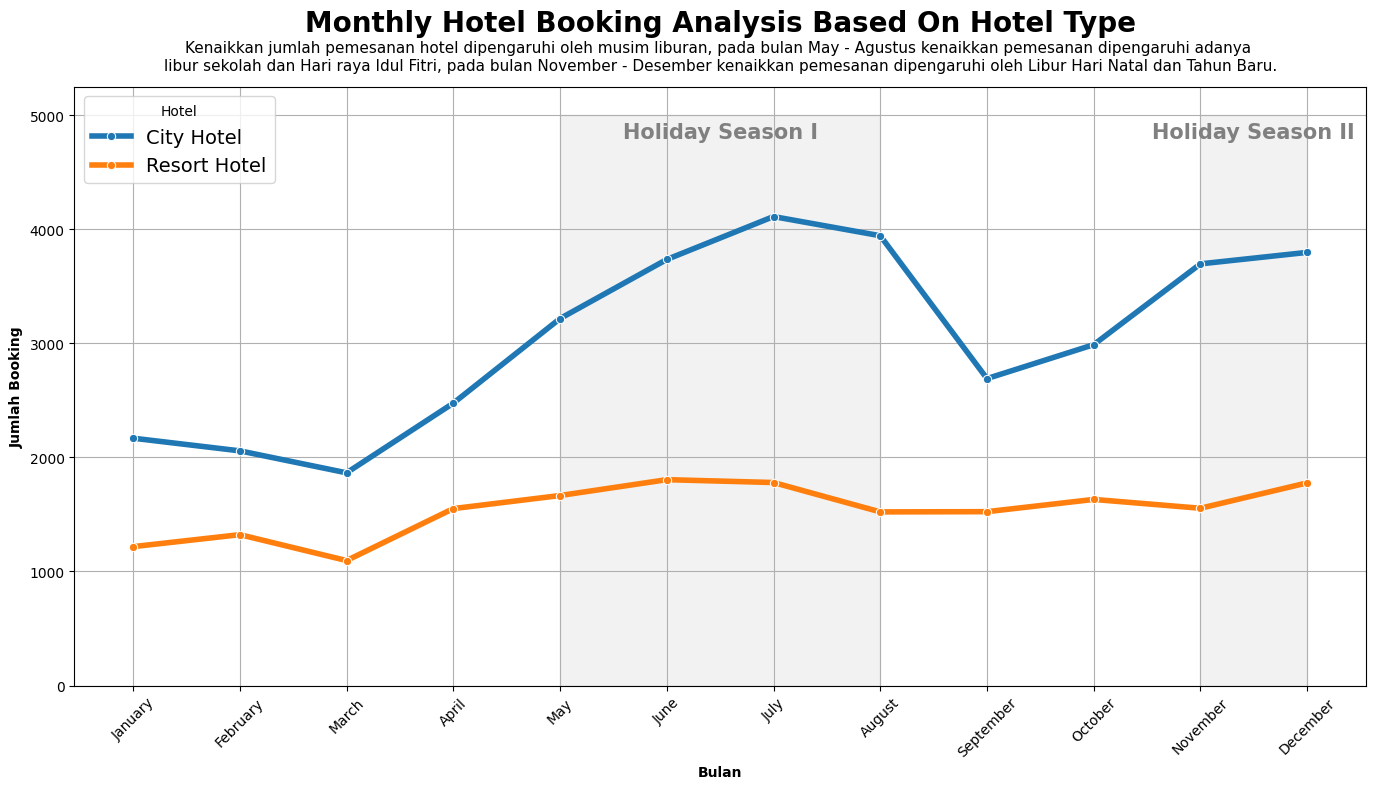

In [ ]:
# Filter data untuk City Hotel dan Resort Hotel
agg_city_resort = agg_table[(agg_table['hotel'] == 'City Hotel') | (agg_table['hotel'] == 'Resort Hotel')]

plt.figure(figsize=(14, 8))

# Line chart untuk City Hotel
sns.lineplot(data=agg_city_resort[agg_city_resort['hotel'] == 'City Hotel'],
             x='arrival_date_month', y='num_bookings',
             marker='o', linewidth=4,  # Menjadikan garis lebih tebal
             label='City Hotel',
             ci=None)  # Menghilangkan area

# Line chart untuk Resort Hotel
sns.lineplot(data=agg_city_resort[agg_city_resort['hotel'] == 'Resort Hotel'],
             x='arrival_date_month', y='num_bookings',
             marker='o', linewidth=4,  # Menjadikan garis lebih tebal
             label='Resort Hotel',
             ci=None)  # Menghilangkan area

plt.title('Monthly Hotel Booking Analysis Based On Hotel Type', fontsize=20, fontweight='bold', pad =40)  # Membuat judul tebal
# Tambahkan teks di bawah judul
plt.text(y=1.05, x=0.5, s='Kenaikkan jumlah pemesanan hotel dipengaruhi oleh musim liburan, pada bulan May - Agustus kenaikkan pemesanan dipengaruhi adanya \nlibur sekolah dan Hari raya Idul Fitri'
                            ', pada bulan November - Desember kenaikkan pemesanan dipengaruhi oleh Libur Hari Natal dan Tahun Baru.',
         ha='center', va='center', size=11, transform=plt.gca().transAxes)
plt.xlabel('Bulan', fontweight='bold')  # Membuat label sumbu x tebal
plt.ylabel('Jumlah Booking', fontweight='bold')  # Membuat label sumbu y tebal
plt.legend(title='Hotel', fontsize=14, loc='upper left')  # Memindahkan legenda ke pojok kiri atas

plt.xticks(rotation=45)
plt.grid(True)

# Menambahkan shading untuk Holiday Season I (Mei-Agustus)
plt.stackplot(range(4, 8), [[5000, 5000, 5000, 5000]], color='grey', alpha=0.1)
plt.text(x=5.5, y=4800, s='Holiday Season I', fontsize=15, fontweight='bold', color='grey', ha='center')  # Membuat teks tebal

# Menambahkan shading untuk Holiday Season II (November-Desember)
plt.stackplot(range(10, 12), [[5000, 5000]], color='grey', alpha=0.1)
plt.text(x=10.5, y=4800, s='Holiday Season II', fontsize=15, fontweight='bold', color='grey', ha='center')  # Membuat teks tebal

plt.tight_layout()
plt.show()

Key Takeaways:

- Peningkatan signifikan dalam pemesanan hotel sering kali terjadi selama musim liburan. **Libur sekolah**, yang umumnya terjadi pada akhir semester pertama di bulan **Juni** dan akhir semester kedua pada bulan **Desember**, menjadi momen penting dimana keluarga merencanakan liburan bersama. Selain itu, libur **Hari Raya Idul Fitri dan Cuti Bersama** pada bulan **Juni-Juli** serta libur **Hari Natal dan Tahun Baru** pada bulan **November-Desember** juga menyebabkan lonjakan aktivitas pemesanan hotel.

- Pada hotel **Resort Hotel** cenderung tidak terjadinya peningkatan pemesanan yang signifikan seperti **City Hotel** yang mengalami peningkatan pemesanan yang signifikan. Hal ini bisa dipengaruhi oleh faktor wilayah dan lokasi, **City Hotel** yang terletak di tengah kota lebih banyak peminatnya karena mudah dijangkau oleh kalangan manapun.

- Grafik ini memperlihatkan bagaimana faktor-faktor musiman dan kalender akademik dapat signifikan mempengaruhi jumlah pemesanan hotel.

# Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates

## Total Duration of Stay

- Membuat feature baru **total_stays** dari total durasi menginap dari feature **stays_in_weekend_nights** dan **stays_in_weekdays_nights**

In [ ]:
# feature total_stays
df_clean['total_stays'] = df_clean['stays_in_weekend_nights'].astype(int) + df_clean['stays_in_weekdays_nights'].astype(int)

# Menampilkan beberapa baris pertama untuk memeriksa hasilnya
print(df_clean[['stays_in_weekend_nights', 'stays_in_weekdays_nights', 'total_stays']])


        stays_in_weekend_nights  stays_in_weekdays_nights  total_stays
0                             0                         0            0
1                             0                         0            0
2                             0                         1            1
3                             0                         1            1
4                             0                         2            2
...                         ...                       ...          ...
119194                        2                         5            7
119195                        2                         5            7
119196                        2                         5            7
119197                        2                         5            7
119198                        2                         7            9

[119199 rows x 3 columns]


## Groupping Stay Duration
- Membuat Kategori dari feature **total_stay** untuk mendefinisikan lama menginap.
- Short Stay = lama menginap <=3 hari
- Medium Stay = lama menginap <= 7 hari
- Long Stay = lama menginap <= 14 hari
- Exctended Stay = lama menginap > 14

In [ ]:
# Menambahkan kolom total_stays
df_clean['total_stays'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']

# Membuat fungsi untuk mengelompokkan berdasarkan kategori durasi menginap
def categorize_stays(total_stays):
    if total_stays <= 3:
        return 'Short Stay'
    elif total_stays <= 7:
        return 'Medium Stay'
    elif total_stays <= 14:
        return 'Long Stay'
    else:
        return 'Extended Stay'

# Menambahkan kolom duration_category berdasarkan total_stays
df_clean['duration_category'] = df_clean['total_stays'].apply(categorize_stays)

# Menghitung jumlah total pemesanan berdasarkan hotel dan duration_category
total_counts = df_clean.groupby(['hotel', 'duration_category']).size().reset_index(name='total')

# Menampilkan hasil
print(total_counts)

          hotel duration_category  total
0    City Hotel     Extended Stay    152
1    City Hotel         Long Stay   1069
2    City Hotel       Medium Stay  21633
3    City Hotel        Short Stay  56302
4  Resort Hotel     Extended Stay    277
5  Resort Hotel         Long Stay   3726
6  Resort Hotel       Medium Stay  16002
7  Resort Hotel        Short Stay  20038


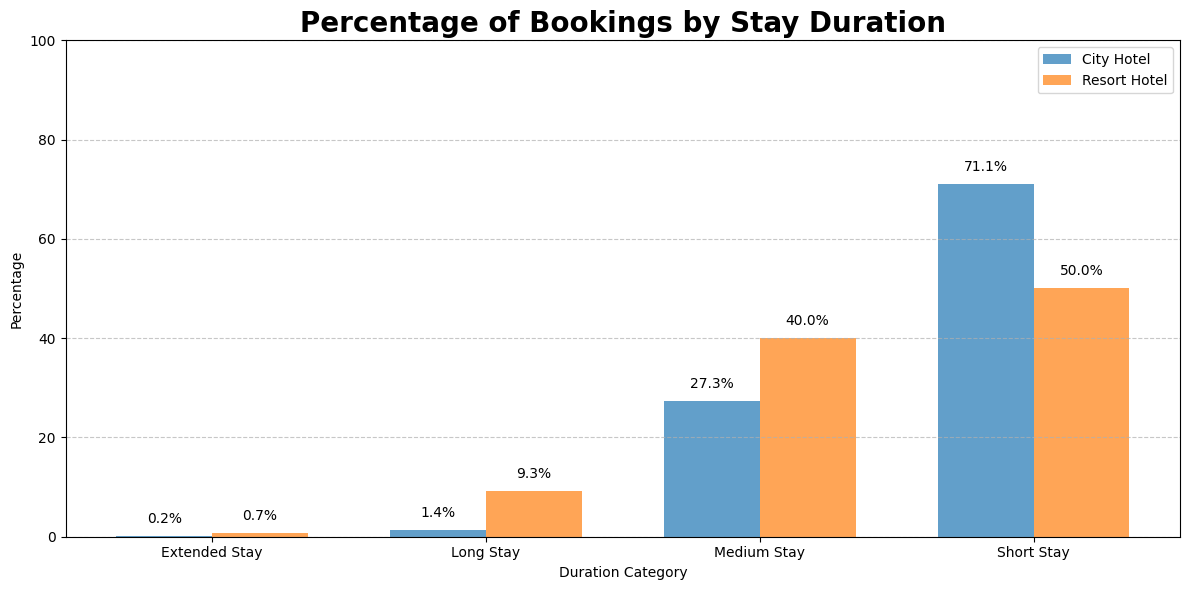

In [ ]:
# Pie CHart
city_hotel = total_counts[total_counts['hotel'] == 'City Hotel']
resort_hotel = total_counts[total_counts['hotel'] == 'Resort Hotel']

# Hitung persentase untuk setiap kategori durasi tinggal
city_hotel['percentage'] = city_hotel['total'] / city_hotel['total'].sum() * 100
resort_hotel['percentage'] = resort_hotel['total'] / resort_hotel['total'].sum() * 100
bar_width = 0.35
x = np.arange(len(city_hotel))

# Membuat Plot
plt.figure(figsize=(12, 6))
# Bar chart untuk City Hotel
bars1 = plt.bar(x - bar_width/2, city_hotel['percentage'], bar_width, label='City Hotel', alpha=0.7)

# Bar chart untuk Resort Hotel
bars2 = plt.bar(x + bar_width/2, resort_hotel['percentage'], bar_width, label='Resort Hotel', alpha=0.7)

# Label dan judul
plt.xlabel('Duration Category')
plt.ylabel('Percentage')
plt.title('Percentage of Bookings by Stay Duration', fontsize=20, fontweight='bold')
plt.xticks(x, city_hotel['duration_category'])
plt.ylim(0, 100)  # Mengatur batas sumbu y dari 0 hingga 100
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    yval2 = bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2., yval1 + 2, f'{yval1:.1f}%', ha='center', va='bottom', fontsize=10)
    plt.text(bar2.get_x() + bar2.get_width()/2., yval2 + 2, f'{yval2:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Key Takeaways:
- Rata-rata yang datang ke hotel bertipe **City Hotel** menginap dengan kategori durasi **Short Stay**
- Hotel dengan tipe **Resort Hotel** mendominasi durasi tamu yang menginap dengan kategori durasi **Medium Stay**, **Long Stay**, dan **Exteneded Stay**

## Cancelled Booking
- Membuat tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel

In [ ]:
# Menghitung jumlah total pemesanan
cancel_counts = df_clean.groupby(['hotel', 'duration_category', 'is_canceled']).size().unstack(fill_value=0)

# Menghitung proporsi pemesanan yang dibatalkan
cancel_counts['total_canceled'] = cancel_counts[1]
cancel_counts['cancel_ratio'] = cancel_counts[1] / (cancel_counts[0] + cancel_counts[1])

# Menggabungkan tabel agregat dengan jumlah total pemesanan
aggregate_table = df_clean.groupby(['hotel', 'duration_category']).size().reset_index(name='total')

# Menggabungkan data total_canceled dan cancel_ratio
aggregate_table = aggregate_table.merge(cancel_counts[['total_canceled', 'cancel_ratio']].reset_index(),
                                        left_on=['hotel', 'duration_category'],
                                        right_on=['hotel', 'duration_category'],
                                        how='left')

aggregate_table['cancel_ratio_percentage'] = aggregate_table['cancel_ratio'] * 100
print(aggregate_table[['hotel', 'duration_category', 'total', 'total_canceled', 'cancel_ratio_percentage']])

          hotel duration_category  total  total_canceled  \
0    City Hotel     Extended Stay    152             117   
1    City Hotel         Long Stay   1069             558   
2    City Hotel       Medium Stay  21633            8373   
3    City Hotel        Short Stay  56302           24026   
4  Resort Hotel     Extended Stay    277             125   
5  Resort Hotel         Long Stay   3726            1077   
6  Resort Hotel       Medium Stay  16002            5145   
7  Resort Hotel        Short Stay  20038            4772   

   cancel_ratio_percentage  
0                76.973684  
1                52.198316  
2                38.704757  
3                42.673440  
4                45.126354  
5                28.904992  
6                32.152231  
7                23.814752  


## Cancellation Rate Based on Duration Categories
- Membuat plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel

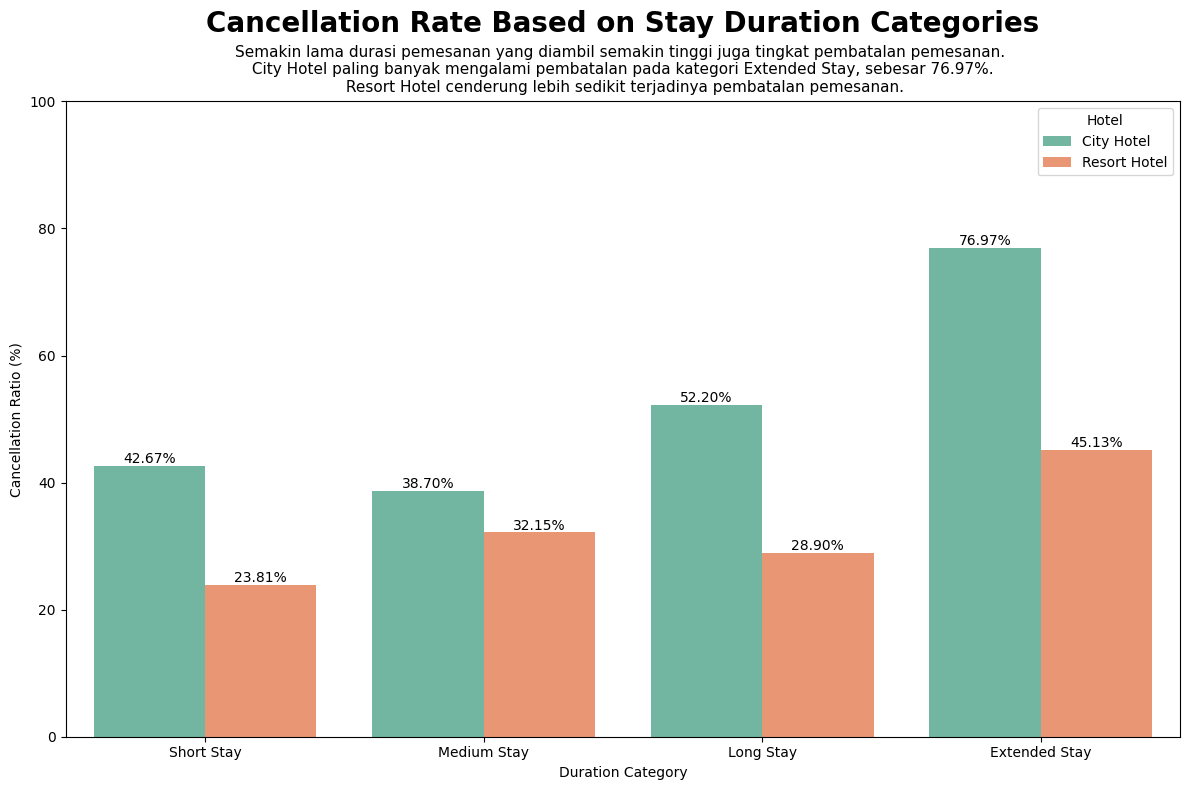

In [ ]:
# Membuat plot
aggregate_table['cancel_ratio_percentage'] = aggregate_table['cancel_ratio'] * 100

duration_order = ['Short Stay', 'Medium Stay', 'Long Stay', 'Extended Stay']

# Membuat Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='duration_category', y='cancel_ratio_percentage', hue='hotel', data=aggregate_table,
                 palette='Set2', order=duration_order)

for p in ax.patches:
    if p.get_height() > 0:  # Filter out bars with cancel_ratio_percentage = 0
        ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Cancellation Rate Based on Stay Duration Categories', fontsize=20, fontweight='bold', pad = 50)
plt.text(y=1.05, x=0.5, s='Semakin lama durasi pemesanan yang diambil semakin tinggi juga tingkat pembatalan pemesanan. \n'
                            ' City Hotel paling banyak mengalami pembatalan pada kategori Extended Stay, sebesar 76.97%. \n'
                            ' Resort Hotel cenderung lebih sedikit terjadinya pembatalan pemesanan.' ,
         ha='center', va='center', size=11, transform=plt.gca().transAxes)
plt.xlabel('Duration Category')
plt.ylabel('Cancellation Ratio (%)')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for percentage
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()

Key Takeaways:
- Data dibagi berdasarkan kategori durasi menginap, yaitu **Short Stay** (1-3 hari), **Medium Stay** (4-7 hari),  **Long Stay** (8-14 hari), dan **Extended Stay** (14-28 hari).
- Lamanya durasi menginap yang diambil mempengaruhi tingkat pembatalan, baik hotel jenis **City Hotel** atau **Resort Hotel** sama-sama mengalami pembatalan yang tinggi pada pemesanan dengan durasi menginap paling panjang (Extended Stay)

- **Resort Hotel** menjadi pilihan terbaik untuk menginap dengan durasi lebih pendek (short stay) dikarenakan persentase pembatalannya yang lebih rendah dibanding **City Hotel**

# Impact Analysis Of Lead Time On Hotel Bookings Cancellation Rate

## Lead Time Category
- Membuat kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan

In [ ]:
# Melihat Rentang lead time
df_clean['lead_time'].value_counts()

lead_time
0      6264
1      3443
2      2064
3      1815
4      1710
       ... 
458       1
709       1
737       1
380       1
463       1
Name: count, Length: 479, dtype: int64

In [ ]:
# Mendefinisikan fungsi untuk kategorisasi lead_time
def categorize_lead_time(lead_time):
    if lead_time <= 30:
        return '1 Month'
    elif lead_time <= 60:
        return '2 Month'
    elif lead_time <= 120:
        return '4 Month'
    elif lead_time <= 180:
        return '6 Month'
    elif lead_time <= 240:
        return '8 Month'
    elif lead_time <= 300:
        return '10 Month'
    elif lead_time <= 360:
        return '12 Month'
    else:
        return '>12 Month'

# Menerapkan fungsi ke kolom lead_time untuk membuat kolom baru lead_time_category
df_clean['lead_time_category'] = df_clean['lead_time'].apply(categorize_lead_time)

# Menampilkan hasil
df_clean[['lead_time', 'lead_time_category']]

,lead_time,lead_time_category
0,342,12 Month
1,737,>12 Month
2,7,1 Month
3,13,1 Month
4,14,1 Month
...,...,...
119194,23,1 Month
119195,102,4 Month
119196,34,2 Month
119197,109,4 Month


## Cancellation Ratio By Lead Time Category
- Membuat tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel

In [ ]:
# Menerapkan fungsi kategorisasi ke kolom lead_time
df_clean['lead_time_category'] = df_clean['lead_time'].apply(categorize_lead_time)

# Menghitung jumlah total dan jumlah pemesanan yang dibatalkan berdasarkan hotel dan lead_time_category
cancel_counts = df_clean.groupby(['hotel', 'lead_time_category'])['is_canceled'].agg(['count', 'sum']).reset_index()

# Menghitung proporsi pemesanan yang dibatalkan
cancel_counts['cancel_ratio'] = cancel_counts['sum'] / cancel_counts['count']

# Mengubah nama kolom count dan sum
cancel_counts = cancel_counts.rename(columns={'count': 'total_booking', 'sum': 'cancelled_booking'})

# Mengubah lead_time_category menjadi tipe kategori dengan urutan yang diinginkan
lead_time_categories = [
    '1 Month', '2 Month', '4 Month', '6 Month', '8 Month', '10 Month', '12 Month', '>12 Month'
]
cancel_counts['lead_time_category'] = pd.Categorical(cancel_counts['lead_time_category'], categories=lead_time_categories, ordered=True)

# Mengurutkan DataFrame berdasarkan hotel dan lead_time_category
cancel_counts_sorted = cancel_counts.sort_values(by=['hotel', 'lead_time_category'])

# Mengalikan cancel_ratio dengan 100 untuk mendapatkan dalam bentuk persentase
cancel_counts_sorted['cancelation_rate'] = cancel_counts_sorted['cancel_ratio'] * 100

# Menampilkan tabel agregat dengan cancelation rate dalam persentase
cancel_counts_sorted[['hotel', 'lead_time_category', 'total_booking', 'cancelled_booking', 'cancelation_rate']]

# Menampilkan tabel agregat yang sudah diurutkan
cancel_counts_sorted

,hotel,lead_time_category,total_booking,cancelled_booking,cancel_ratio,cancelation_rate
0,City Hotel,1 Month,23239,5180,0.222901,22.290116
3,City Hotel,2 Month,11872,4607,0.388056,38.805593
4,City Hotel,4 Month,16344,7178,0.439183,43.918257
5,City Hotel,6 Month,10764,5258,0.488480,48.848012
6,City Hotel,8 Month,6097,3073,0.504018,50.401837
1,City Hotel,10 Month,4636,3096,0.667817,66.781708
2,City Hotel,12 Month,3340,2608,0.780838,78.083832
7,City Hotel,>12 Month,2864,2074,0.724162,72.416201
8,Resort Hotel,1 Month,15335,1984,0.129377,12.937724
11,Resort Hotel,2 Month,5077,1565,0.308253,30.825291


## Plot Ratio Cancellation to Lead Time
- Membuat plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel

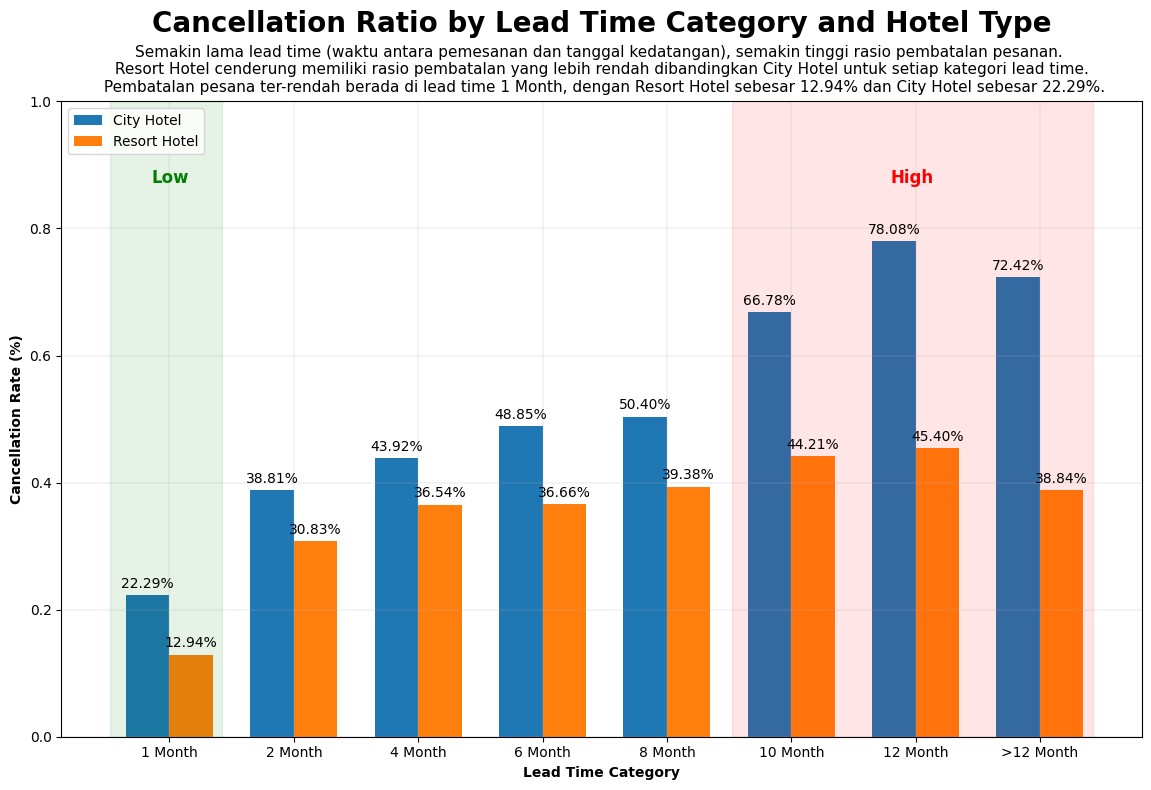

In [ ]:
# Memilih data untuk City Hotel dan Resort Hotel
city_hotel_data = cancel_counts_sorted[cancel_counts_sorted['hotel'] == 'City Hotel']
resort_hotel_data = cancel_counts_sorted[cancel_counts_sorted['hotel'] == 'Resort Hotel']

bar_width = 0.35
index = np.arange(len(city_hotel_data))
plt.figure(figsize=(12, 8))

# Palet warna untuk City Hotel dan Resort Hotel
colors = ['#1f77b4', '#ff7f0e']

# Plot untuk City Hotel
bars_city = plt.bar(index, city_hotel_data['cancel_ratio'], bar_width, label='City Hotel', color=colors[0])

# Plot untuk Resort Hotel
bars_resort = plt.bar(index + bar_width, resort_hotel_data['cancel_ratio'], bar_width, label='Resort Hotel', color=colors[1])

plt.title('Cancellation Ratio by Lead Time Category and Hotel Type', fontsize=20, fontweight='bold', pad=50)
plt.xlabel('Lead Time Category', fontsize=10, fontweight='bold')
plt.ylabel('Cancellation Rate (%)', fontsize=10, fontweight='bold')
plt.xticks(index + bar_width / 2, city_hotel_data['lead_time_category'])
plt.legend(loc='upper left')

# Fungsi untuk menambahkan label persentase di atas bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{:.2f}%'.format(height * 100),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bars_city)
autolabel(bars_resort)
plt.text(y=1.05, x=0.5, s='Semakin lama lead time (waktu antara pemesanan dan tanggal kedatangan), semakin tinggi rasio pembatalan pesanan. \n'
                            ' Resort Hotel cenderung memiliki rasio pembatalan yang lebih rendah dibandingkan City Hotel untuk setiap kategori lead time. \n'
                            ' Pembatalan pesana ter-rendah berada di lead time 1 Month, dengan Resort Hotel sebesar 12.94% dan City Hotel sebesar 22.29%.' ,
         ha='center', va='center', size=11, transform=plt.gca().transAxes)

# Shading Low
plt.axvspan(index[0] - 0.3, index[0] + 0.6, alpha=0.1, color='green')
plt.text((index[0] + index[0] + 0.6) / 3.3, 0.88, 'Low', ha='center', va='center', fontsize=12, fontweight='bold', color='green')

# Shading High
# Menentukan indeks untuk kategori '10 Bulan', '12 Bulan', dan '>12 Bulan'
index_10_month = np.where(city_hotel_data['lead_time_category'] == '10 Month')[0][0]
index_12_month = np.where(city_hotel_data['lead_time_category'] == '12 Month')[0][0]
index_gt_12_month = np.where(city_hotel_data['lead_time_category'] == '>12 Month')[0][0]
plt.axvspan(index[index_10_month] - 0.3, index[index_gt_12_month] + 0.6, alpha=0.1, color='red', label='High')
plt.text((index[index_10_month] + index_gt_12_month + 0.6) / 2.05, 0.88, 'High', ha='center', va='center', fontsize=12, fontweight='bold', color='red')


plt.ylim(0, 1.0)
plt.tight_layout()
plt.grid(True, linewidth=0.2)
plt.show()


Key Takeaways:
- Semakin lama lead time (waktu antara pemesanan dan tanggal kedatangan), semakin tinggi rasio pembatalan pesanan. Ini menunjukkan bahwa pelanggan yang memesan dengan lead time yang lebih lama cenderung memiliki kemungkinan pembatalan yang lebih tinggi. Pada lead time 12 bulan, rasio pembatalan di **City Hotel** mencapai **78.08%**, sedangkan untuk lead time 1 bulan rasionya sebesar **22.29%**. Pola yang serupa terlihat di **Resort Hotel**, meskipun dengan variasi pembatalan lebih rendah. Rasio pembatalan cenderung meningkat dengan lead time yang lebih lama. Pada lead time 12 bulan, rasio pembatalan sebesar **45.40%**, sementara untuk lead time 1 bulan hanya sebesar **12.94%**.

- Dengan memahami pola ini, hotel dapat mengoptimalkan strategi manajemen reservasi mereka, seperti menyesuaikan kebijakan pembatalan atau menawarkan insentif untuk pelanggan dengan lead time yang lebih lama, sehingga dapat mengurangi risiko pembatalan dan meningkatkan pendapatan kamar hotel secara keseluruhan.